In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
netflix=pd.read_csv('netflix.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

So from the result of above code tab we can see there is 6131 Movies in the dataset and 2676 TV Show in the data set.

In [6]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

So from the above code tab result we can see there is null value in **director**,**cast**,**country**,**date_added**,**rating** and **duration** column.

In **director**,**cast**,**date_added** column will fill null value separately for Movie and TV Show

Let fill the null values in **country** column with **unknown country**
Additionally We need to explode country column because for one movie or tv show there might be multiole country associated with it

In [7]:
netflix['country']=netflix['country'].fillna('Unknown Country')
netflix['country']=netflix['country'].apply(lambda x: x.split(", "))
netflix=netflix.explode('country')

Let seperate Movies and Tv Shows into different data frame to analyse them seperately

In [8]:
#Creating Movies Data Frame
movies=netflix[netflix['type']=='Movie']
#Converting date_added column into datetime
movies['date_added']=pd.to_datetime(movies['date_added'])
movies.head()

<ipython-input-8-a8f8c8d2175f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['date_added']=pd.to_datetime(movies['date_added'])


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7814 non-null   object        
 1   type          7814 non-null   object        
 2   title         7814 non-null   object        
 3   director      7603 non-null   object        
 4   cast          7186 non-null   object        
 5   country       7814 non-null   object        
 6   date_added    7814 non-null   datetime64[ns]
 7   release_year  7814 non-null   int64         
 8   rating        7812 non-null   object        
 9   duration      7811 non-null   object        
 10  listed_in     7814 non-null   object        
 11  description   7814 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 793.6+ KB


In [10]:
movies.isna().sum()

show_id           0
type              0
title             0
director        211
cast            628
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

So From the above result, we can see in Movies Data Frame **director**,**cast**, **rating** and **duration** has null values. Rows with null values in **rating** and **duration** column can be dropped as they do not have significant records.
For **director** and **cast** we can fell them as unknown director and unknown cast and the ignore the unknown cast and directors at the time of analysis. This way we can save a lot of data being dropped.
Additionally **director**,**cast** and **listed_in** columns have multiple values comman seperated. So we need to sepetrate it

In [11]:
movies['listed_in']=movies['listed_in'].apply(lambda x: x.split(", "))
#movies=movies.explode('listed_in')

<ipython-input-11-f8bcf6380fef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['listed_in']=movies['listed_in'].apply(lambda x: x.split(", "))


In [12]:
movies['director']=movies['director'].fillna("Unknown Director")
movies['director']=movies['director'].apply(lambda x: x.split(","))
#movies=movies.explode('director')


movies['cast']=movies['cast'].fillna("Unknown Cast")
movies['cast']=movies['cast'].apply(lambda x: x.split(","))
#movies=movies.explode('cast')

#Drop other null values
movies.dropna(how='any',axis=0,inplace=True)

<ipython-input-12-0bb416ed7b84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['director']=movies['director'].fillna("Unknown Director")
<ipython-input-12-0bb416ed7b84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['director']=movies['director'].apply(lambda x: x.split(","))
<ipython-input-12-0bb416ed7b84>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [13]:
movies.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

So there is no Null values in Movies Data Frame Now

In Duration Column it is String now but we can not analyse string in duration column so let make it number

In [14]:
movies['duration']=movies['duration'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-14-87c78a54f402>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].apply(lambda x: int(x.split(" ")[0]))


Now lets seperate and prepare Tv Shows Data Frame

In [15]:
tv_shows=netflix[netflix['type']=='TV Show']
tv_shows['date_added']=pd.to_datetime(tv_shows['date_added'])
tv_shows.head()

<ipython-input-15-74e61d91e2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['date_added']=pd.to_datetime(tv_shows['date_added'])


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [16]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3031 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       3031 non-null   object        
 1   type          3031 non-null   object        
 2   title         3031 non-null   object        
 3   director      272 non-null    object        
 4   cast          2655 non-null   object        
 5   country       3031 non-null   object        
 6   date_added    3021 non-null   datetime64[ns]
 7   release_year  3031 non-null   int64         
 8   rating        3029 non-null   object        
 9   duration      3031 non-null   object        
 10  listed_in     3031 non-null   object        
 11  description   3031 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 307.8+ KB


In [17]:
tv_shows.isna().sum()

show_id            0
type               0
title              0
director        2759
cast             376
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

So From the above result, we can see in Movies Data Frame **director**,**cast**, **rating** and **date_added** has null values. Rows with null values in **rating** column can be dropped as they do not have significant records.
For **director** and **cast** we can fell them as unknown director and unknown cast and the ignore the unknown cast and directors at the time of analysis. This way we can save a lot of data being dropped.
Additionally **director**,**cast** and **listed_in** columns have multiple values comman seperated. So we need to sepetrate it

In [18]:
tv_shows['listed_in']=tv_shows['listed_in'].apply(lambda x: x.split(", "))
#tv_shows=tv_shows.explode('listed_in')

<ipython-input-18-a902b9c00513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['listed_in']=tv_shows['listed_in'].apply(lambda x: x.split(", "))


Lets fill null value in date_added column with last tv_show added date.

In [19]:
tv_shows['date_added'].fillna(tv_shows['date_added'].max(),inplace=True)

<ipython-input-19-ebb29067a877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['date_added'].fillna(tv_shows['date_added'].max(),inplace=True)


In [20]:
tv_shows['director']=tv_shows['director'].fillna("Unknown Director")
tv_shows['director']=tv_shows['director'].apply(lambda x: x.split(","))
#tv_shows=tv_shows.explode('director')


tv_shows['cast']=tv_shows['cast'].fillna("Unknown Cast")
tv_shows['cast']=tv_shows['cast'].apply(lambda x: x.split(","))
#tv_shows=tv_shows.explode('cast')


#Drop other null values
tv_shows.dropna(how='any',axis=1,inplace=True)

<ipython-input-20-3df04769f3bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['director']=tv_shows['director'].fillna("Unknown Director")
<ipython-input-20-3df04769f3bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['director']=tv_shows['director'].apply(lambda x: x.split(","))
<ipython-input-20-3df04769f3bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [21]:
tv_shows.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64

So there is no Null values in Tv Shows Data Frame Now

In Duration Column it is String now but we can not analyse string in duration column so let make it number

In [22]:
tv_shows['duration']=tv_shows['duration'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-22-2c5e3a817aa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration']=tv_shows['duration'].apply(lambda x: int(x.split(" ")[0]))


<h2>As **DATA PREPARED** for analysis lets do  start our analysis.<h2>

<h1>Let explore How has the number of movies and TV shows released per year changed over the last 20-30 years?<h1>

In [23]:
movies_released_year=movies.groupby('release_year')['show_id']\
                           .count().reset_index().tail(30).rename(columns={'show_id':'count'})
movies_released_year.sort_values(by='count',ascending=False)[:5]

,release_year,count
68,2017,972
69,2018,963
67,2016,878
70,2019,763
71,2020,564


In [24]:
tv_shows_released_year=tv_shows.groupby('release_year')['show_id']\
                           .count().reset_index().tail(30).rename(columns={'show_id':'count'})
tv_shows_released_year.sort_values(by='count',ascending=False)[:5]

,release_year,count
44,2020,490
43,2019,445
42,2018,427
45,2021,345
41,2017,302


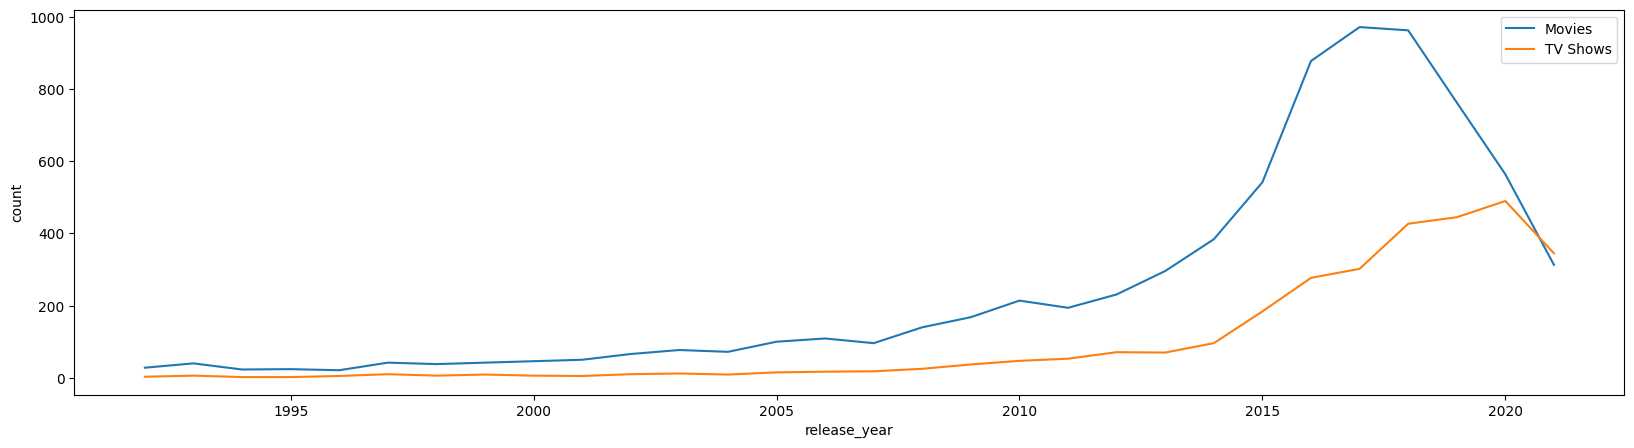

In [25]:
plt.figure(figsize = (20, 5))
sns.lineplot(movies_released_year,x='release_year',y='count',label='Movies')
sns.lineplot(tv_shows_released_year,x='release_year',y='count',label='TV Shows')
plt.legend()

So here We can clearly see that from 2005 to 2019, The release of Movies and Tv shows was constantly increasing, but from 2019, both movies and TV shows dropped drastically.
As we all know from 2019 to 2021 the whole world was under the COVID-19 pandemic, possibaly the pandemic was resasone for a sudden drop in releases

<h1> Now lets analyse  the number of TV shows and Movies<h1>

<Axes: xlabel='type', ylabel='count'>

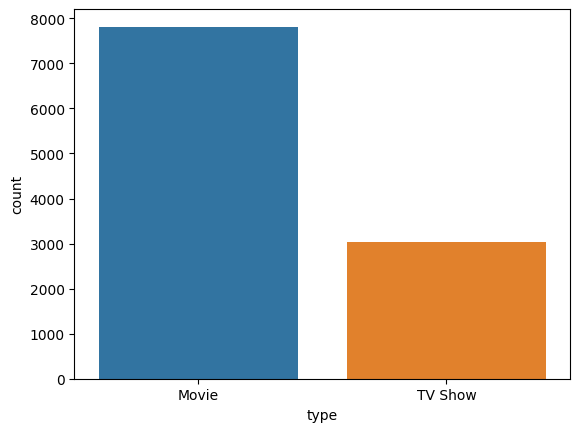

In [26]:
sns.countplot(x=netflix['type'])

From the above plot it is clear that in netflix there is More movies than TV shows.
If we consider this number as the indicator of popularity, then we can conclude movies are way more popular in netflix as per this data.

<h1> Lets explore In which month people watch which type of content.<h1>

<h3> Lets explore Movies first<h3>

In [27]:
movies['Months']=movies['date_added'].dt.month_name()
tv_shows['Months']=tv_shows['date_added'].dt.month_name()

<ipython-input-27-ba233f86bd0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Months']=movies['date_added'].dt.month_name()
<ipython-input-27-ba233f86bd0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['Months']=tv_shows['date_added'].dt.month_name()


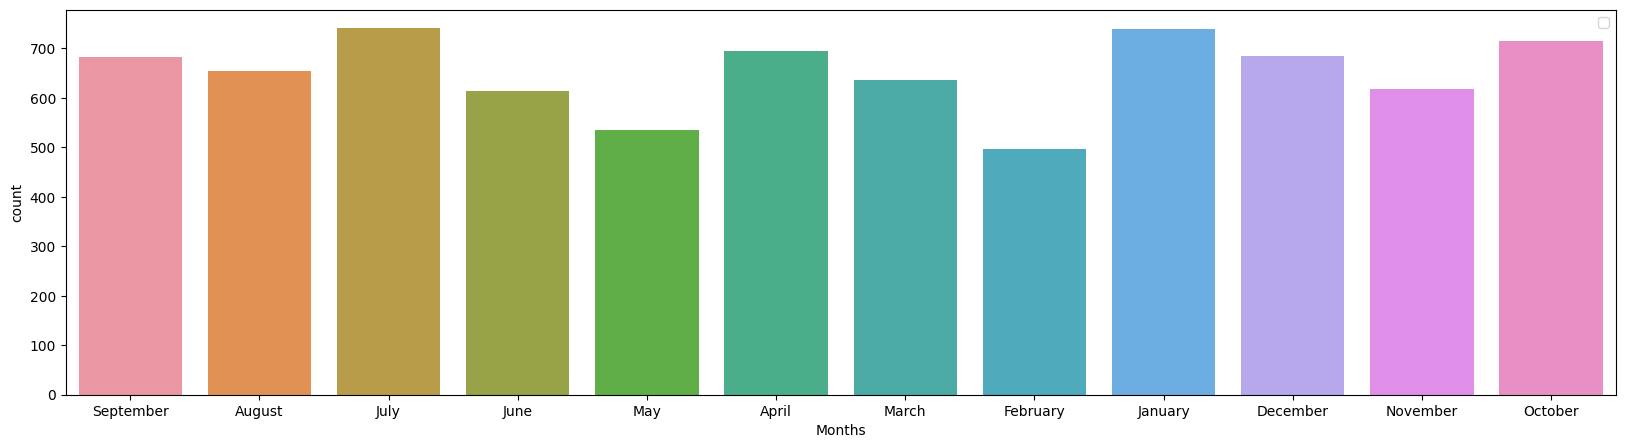

In [28]:
plt.figure(figsize = (20, 5))
sns.countplot(x=movies['Months'])
plt.legend()

So in world wide in July and January, Netflix add more movies in there platform.
If we consider this number as a indicator of popularity, that means people do watch movies in all over the year. But in july and January viwership increases.

<h2> No w let Explore in in top 2 to 3 country which month is more popular<h2>

In [29]:
movies['country'].value_counts()

United States      2748
India               962
United Kingdom      532
Unknown Country     439
Canada              319
                   ... 
Ecuador               1
Armenia               1
Mongolia              1
Mozambique            1
Montenegro            1
Name: country, Length: 123, dtype: int64

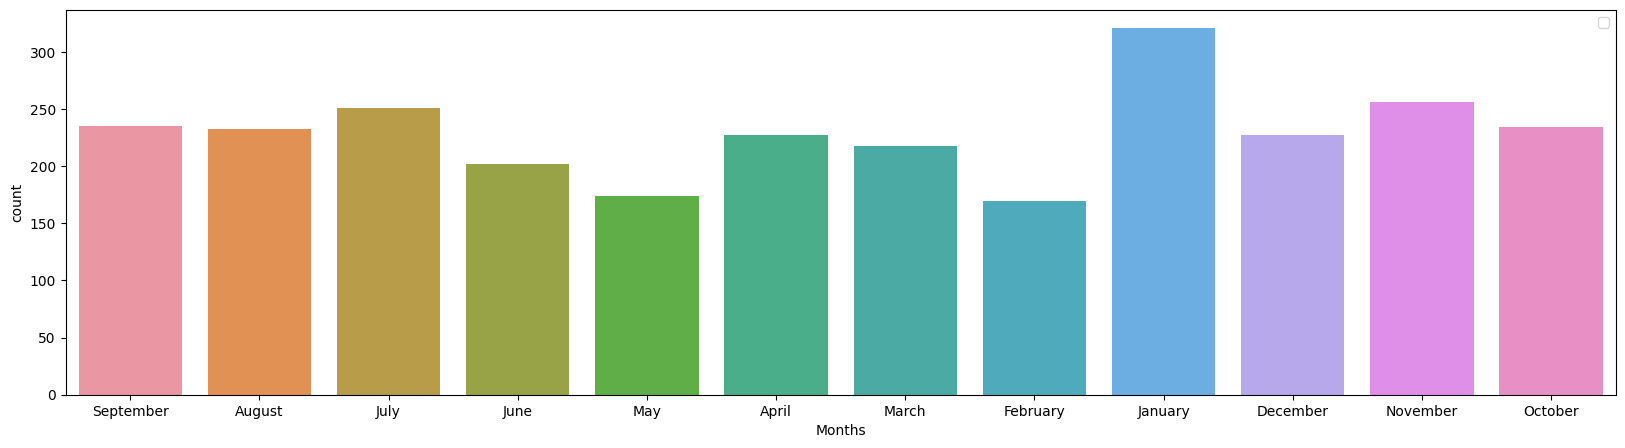

In [30]:
plt.figure(figsize = (20, 5))
sns.countplot(x=movies[movies['country']=='United States']['Months'])
plt.legend()

Here We can see in **United States** in January people watch more movies than rest of the year.

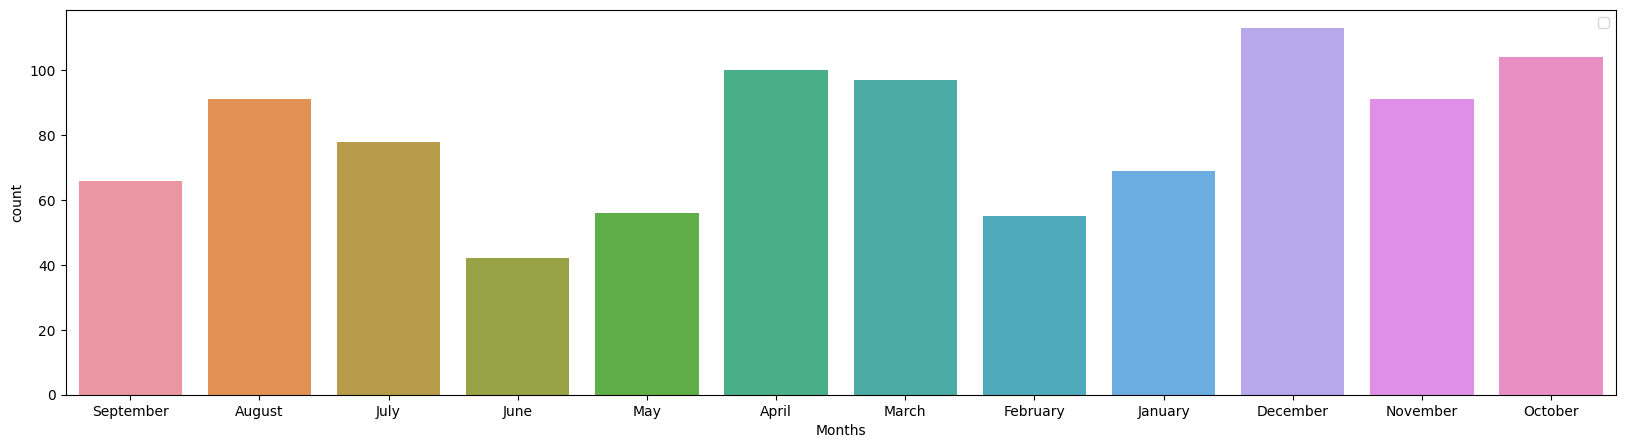

In [31]:
plt.figure(figsize = (20, 5))
sns.countplot(x=movies[movies['country']=='India']['Months'])
plt.legend()

Here We can see in **India** in December people watch more movies than rest of the year.

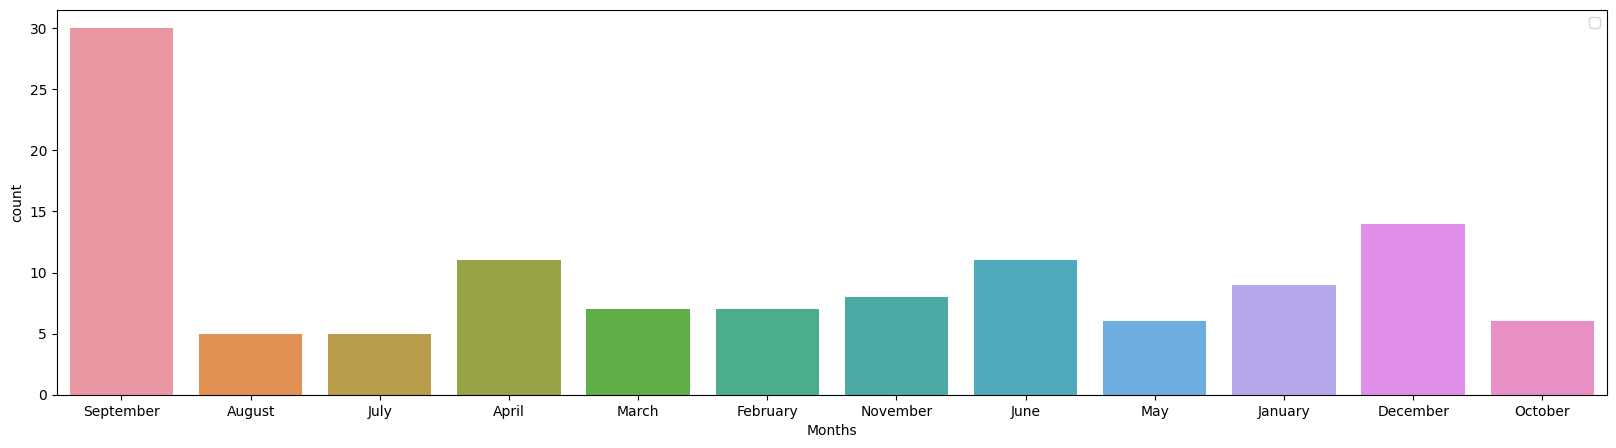

In [32]:
plt.figure(figsize = (20, 5))
sns.countplot(x=movies[movies['country']=='Japan']['Months'])
plt.legend()

Here We can see in **Japan** in September people watch more movies than rest of the year.

<h1> Now lets explore the same for TV shows<h1>

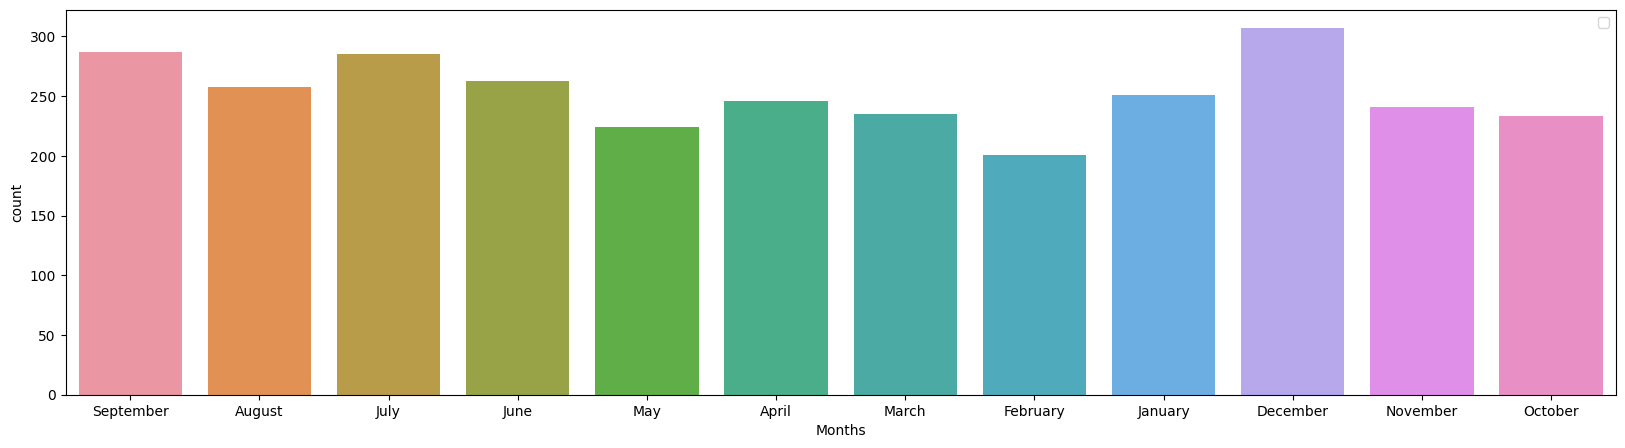

In [33]:
plt.figure(figsize = (20, 5))
sns.countplot(x=tv_shows['Months'])
plt.legend()

From the above plot it is clear that in worldwide December is more popular for TV Shows

<h3> Lets explore the same for top 2 to 3 countries for TV Shows<h3>

In [34]:
tv_shows['country'].value_counts()

United States           938
Unknown Country         391
United Kingdom          272
Japan                   199
South Korea             170
                       ... 
Malta                     1
United Arab Emirates      1
Belarus                   1
Uruguay                   1
Switzerland               1
Name: country, Length: 67, dtype: int64

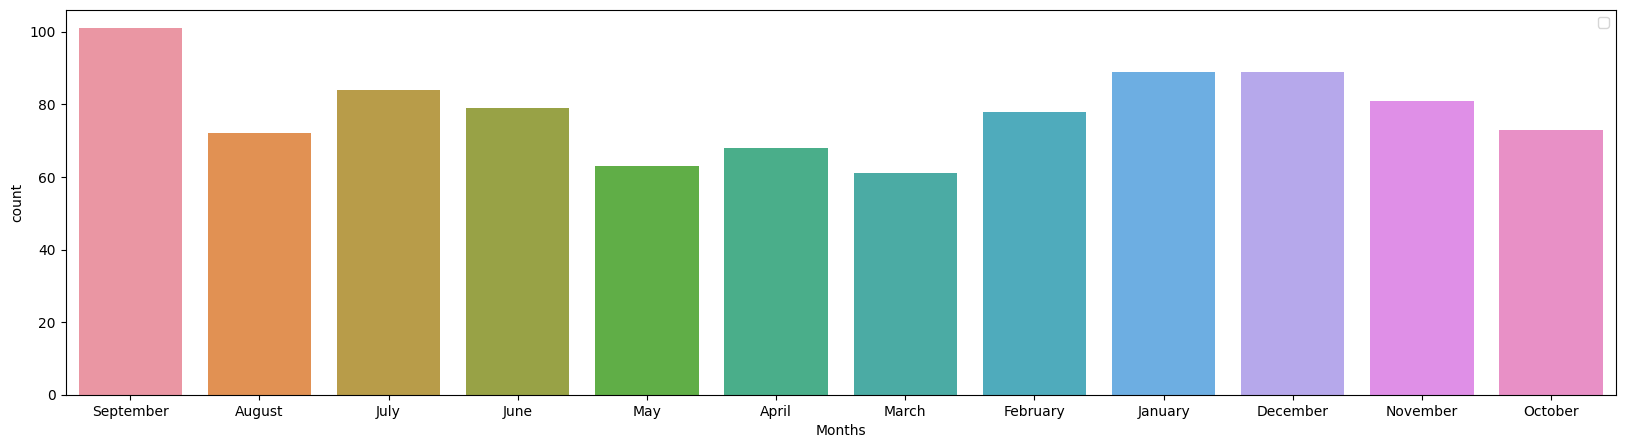

In [35]:
plt.figure(figsize = (20, 5))
sns.countplot(x=tv_shows[tv_shows['country']=='United States']['Months'])
plt.legend()

Here We can see in **United States** in September people watch more TV shows than rest of the year.

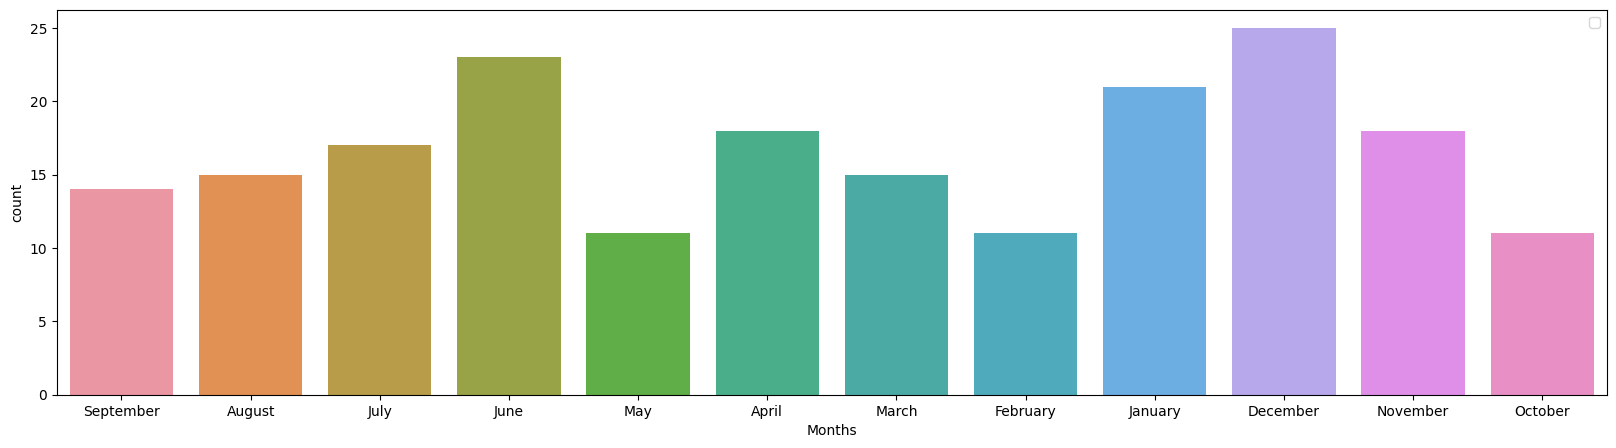

In [36]:
plt.figure(figsize = (20, 5))
sns.countplot(x=tv_shows[tv_shows['country']=='Japan']['Months'])
plt.legend()

Here We can see in **Japan** in June and December people watch more TV shows than rest of the year.

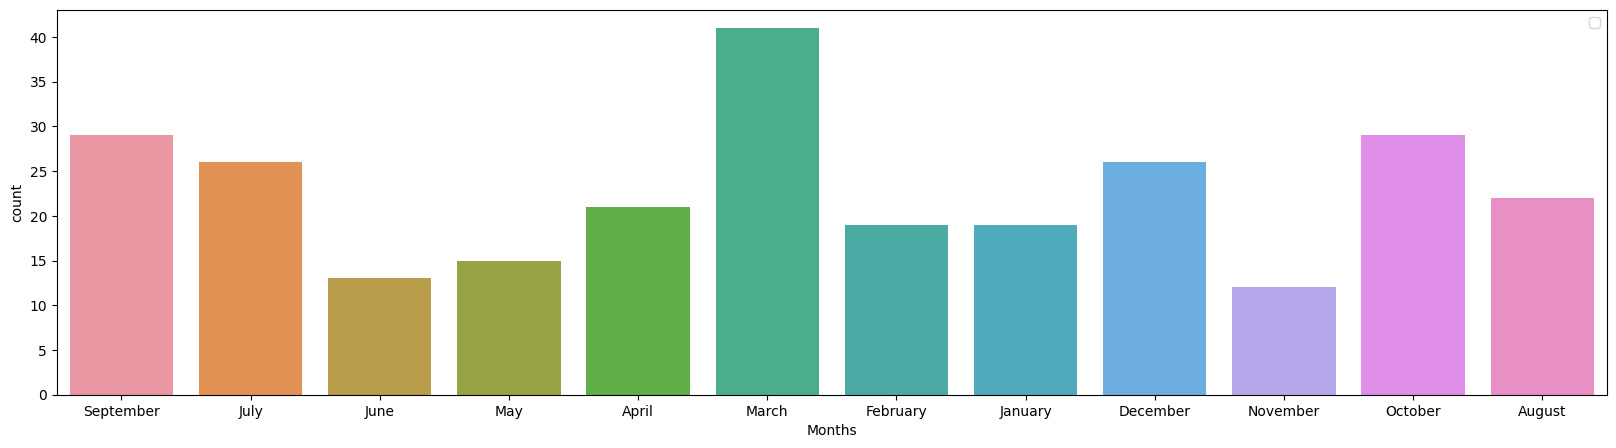

In [37]:
plt.figure(figsize = (20, 5))
sns.countplot(x=tv_shows[tv_shows['country']=='United Kingdom']['Months'])
plt.legend()

Here We can see in **United Kingdom** in March people watch more TV shows than rest of the year.

<h1>Analysis of actors/directors of different types of shows/movies.<h1>

<h2> Lets explore the actors<h2>

In [38]:
movies_cast=movies.explode('cast')
movies_cast=movies_cast[movies_cast['cast']!='Unknown Cast']
movies_cast_count=movies_cast['cast'].value_counts().to_frame().reset_index().rename(columns={'index':'cast','cast':'count'})\
        .sort_values(by=['count'],ascending=False).head(20)

movies_cast_count

,cast,count
0,Anupam Kher,39
1,Alfred Molina,34
2,Om Puri,32
3,Brendan Gleeson,31
4,John Cleese,31
5,Boman Irani,29
6,Paresh Rawal,27
7,Eddie Marsan,27
9,Rupa Bhimani,27
8,Shah Rukh Khan,27


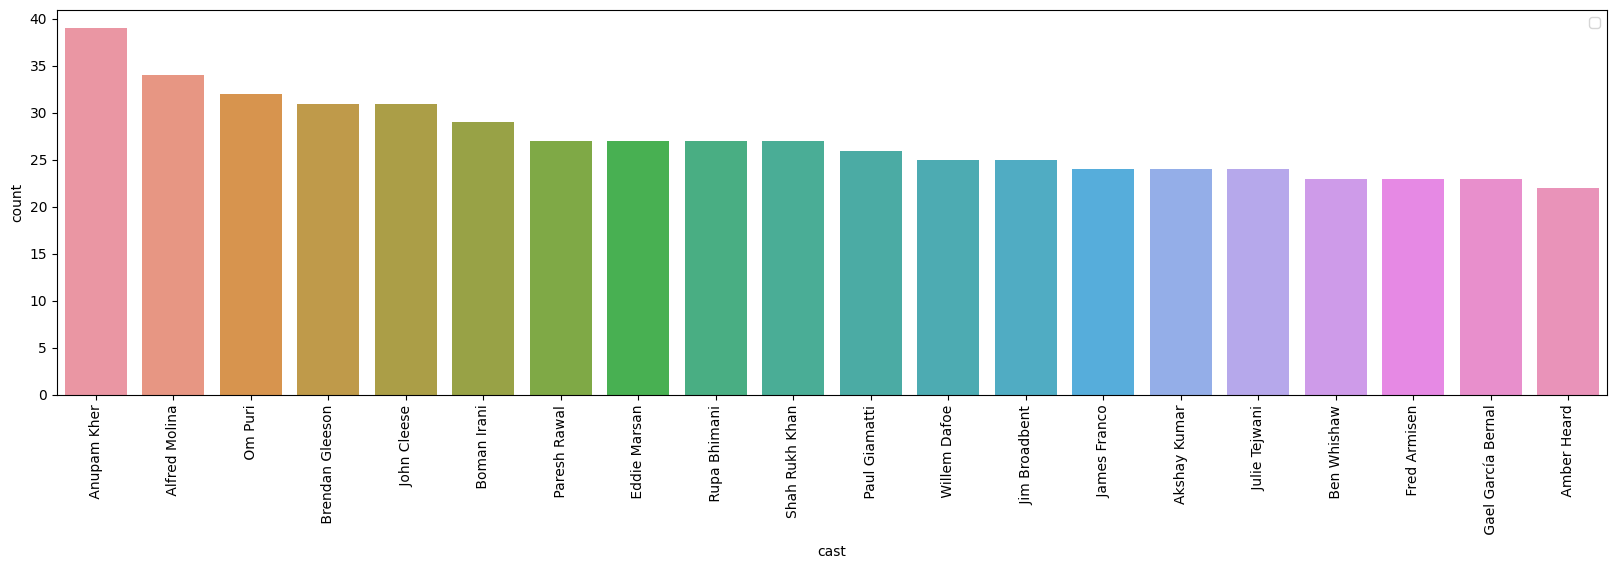

In [39]:
plt.figure(figsize = (20, 5))
sns.barplot(x=movies_cast_count['cast'],y=movies_cast_count['count'])
plt.xticks(rotation=90)
plt.legend()

From the above analysis we can see a very shocking result. Anupam kher has more Movies than Shah Rukh Khan.
Probably Anupam kher has worked in movies for supporing role as well as lead role but Shah Rukh Khan has only worked on lead role.

<h2> Now lets explore which actor has done which type of movie<h2>

In [40]:
movies_cast_type=movies_cast.explode('listed_in')

movies_cast_type_count=movies_cast_type.groupby(['cast','listed_in'])['show_id'].count().reset_index().rename(columns={'show_id':'count'})\
        .sort_values(by=['count'],ascending=False).head(20)
movies_cast_type_count

,cast,listed_in,count
5470,Anupam Kher,International Movies,34
8842,Boman Irani,International Movies,27
46570,Om Puri,International Movies,25
53505,Rupa Bhimani,Children & Family Movies,25
5468,Anupam Kher,Dramas,25
75409,Shah Rukh Khan,International Movies,24
47272,Paresh Rawal,International Movies,24
31074,Julie Tejwani,Children & Family Movies,24
29182,John Cleese,Comedies,22
67660,Akshay Kumar,International Movies,22


From the above Chart we can see Indian actors has more work in netflix than any other actors in the world. And most indian actors has worked in International Movies

<h2> Lets explore which actor has worked with which director<h2>

In [41]:
movies_cast_director=movies_cast.explode('director')
movies_cast_director=movies_cast_director[movies_cast_director['director']!='Unknown Director']
movies_cast_director.groupby(['cast','director'])['show_id'].count().reset_index().rename(columns={'show_id':'count'})\
        .sort_values(by=['count'],ascending=False).head(20)

,cast,director,count
30478,Rajesh Kava,Rajiv Chilaka,19
18981,Julie Tejwani,Rajiv Chilaka,19
17094,Jigna Bhardwaj,Rajiv Chilaka,18
32466,Rupa Bhimani,Rajiv Chilaka,18
46126,Vatsal Dubey,Rajiv Chilaka,16
26486,Mousam,Rajiv Chilaka,13
36436,Swapnil,Rajiv Chilaka,13
35645,Stellan Skarsgård,Lars von Trier,11
41686,Charlotte Gainsbourg,Lars von Trier,11
7325,Christian Slater,Lars von Trier,11


From the above chart we can see most of the Indian actors has worked with director Rajiv Chilaka and in the cast he is most popular director.

<h2>Lets explore the actors for TV Shows <h2>

In [42]:
tv_shows_cast=tv_shows.explode('cast')
tv_shows_cast=tv_shows_cast[tv_shows_cast['cast']!='Unknown Cast']
tv_shows_cast_count=tv_shows_cast['cast'].value_counts().to_frame().reset_index().rename(columns={'index':'cast','cast':'count'})\
        .sort_values(by=['count'],ascending=False).head(20)

tv_shows_cast_count

,cast,count
0,David Attenborough,28
1,Takahiro Sakurai,24
2,Vincent Tong,20
3,Ai Kayano,17
4,Brian Drummond,17
5,Yuki Kaji,17
6,Junichi Suwabe,17
8,Ashleigh Ball,15
9,Johnny Yong Bosch,15
7,Andrea Libman,15


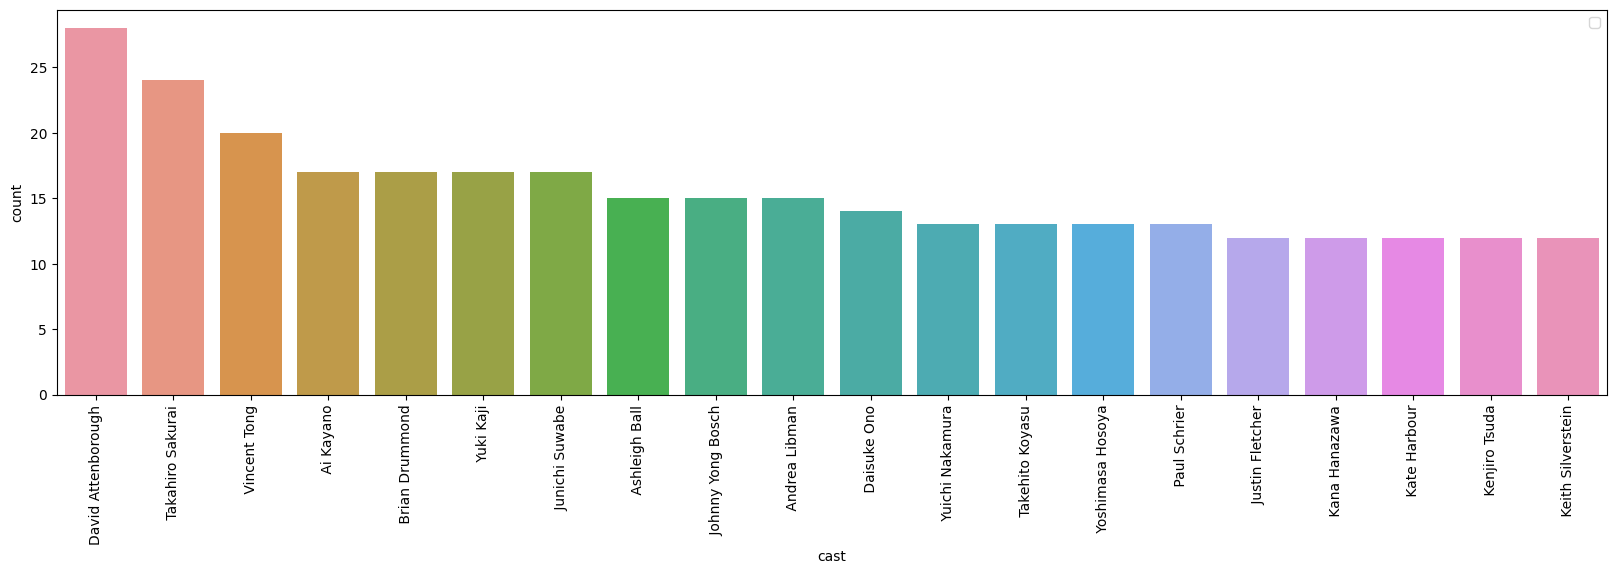

In [43]:
plt.figure(figsize = (20, 5))
sns.barplot(x=tv_shows_cast_count['cast'],y=tv_shows_cast_count['count'])
plt.xticks(rotation=90)
plt.legend()

From the above analysis we can conclude David Attenborough	 is the most popular cast in TV shows.

<h2> Now lets explore which cast has done Which type of TV Shows<h2>

In [44]:
tv_shows_cast_type=tv_shows_cast.explode('listed_in')
tv_shows_cast_type_count=tv_shows_cast_type.groupby(['cast','listed_in'])['show_id'].count().reset_index().rename(columns={'show_id':'count'})\
        .sort_values(by=['count'],ascending=False).head(20)
tv_shows_cast_type_count

,cast,listed_in,count
36650,David Attenborough,Docuseries,28
36649,David Attenborough,British TV Shows,26
31551,Takahiro Sakurai,Anime Series,23
31553,Takahiro Sakurai,International TV Shows,21
33529,Vincent Tong,Kids' TV,20
36652,David Attenborough,Science & Nature TV,17
580,Ai Kayano,Anime Series,17
15990,Junichi Suwabe,Anime Series,16
34830,Yuki Kaji,Anime Series,16
581,Ai Kayano,International TV Shows,16


Here we can see Most popular cast David Attenborough	has mostly worked on British TV Shows	and Docuseries

<h2> Lets analyse which cast has worked with which director<h2>

In [45]:
tv_shows_cast_director=tv_shows_cast.explode('director')
tv_shows_cast_director=tv_shows_cast_director[tv_shows_cast_director['director']!='Unknown Director']
tv_shows_cast_director_count=tv_shows_cast_director.groupby(['cast','director'])['show_id'].count().reset_index().rename(columns={'show_id':'count'})\
        .sort_values(by=['count'],ascending=False).head(20)
tv_shows_cast_director_count

,cast,director,count
2162,David Attenborough,Alastair Fothergill,8
1246,Melissa George,Houda Benyamina,4
553,Elyes Aguis,Houda Benyamina,4
1921,Tchéky Karyo,Damien Chazelle,4
1920,Tchéky Karyo,Laïla Marrakchi,4
1919,Tchéky Karyo,Houda Benyamina,4
1918,Tchéky Karyo,Alan Poul,4
1895,Tahar Rahim,Damien Chazelle,4
1894,Tahar Rahim,Laïla Marrakchi,4
1893,Tahar Rahim,Houda Benyamina,4


Here we can see most popular cast in TV shows David Attenborough mostly worked with director Alastair Fothergill

<h2> Now Lets analyse the Directors<h2>

In [46]:
movies_director=movies.explode('director')
movies_director=movies_director[movies_director['director']!='Unknown Director']
movies_director_count=movies_director['director'].value_counts().to_frame().reset_index().rename(columns={'index':'director','director':'count'})\
        .sort_values(by=['count'],ascending=False).head(20)

movies_director_count


,director,count
0,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Martin Scorsese,18
1,Steven Spielberg,18
5,Youssef Chahine,17
6,Suhas Kadav,16
7,Jay Karas,15
8,Martin Campbell,15
9,Don Michael Paul,15


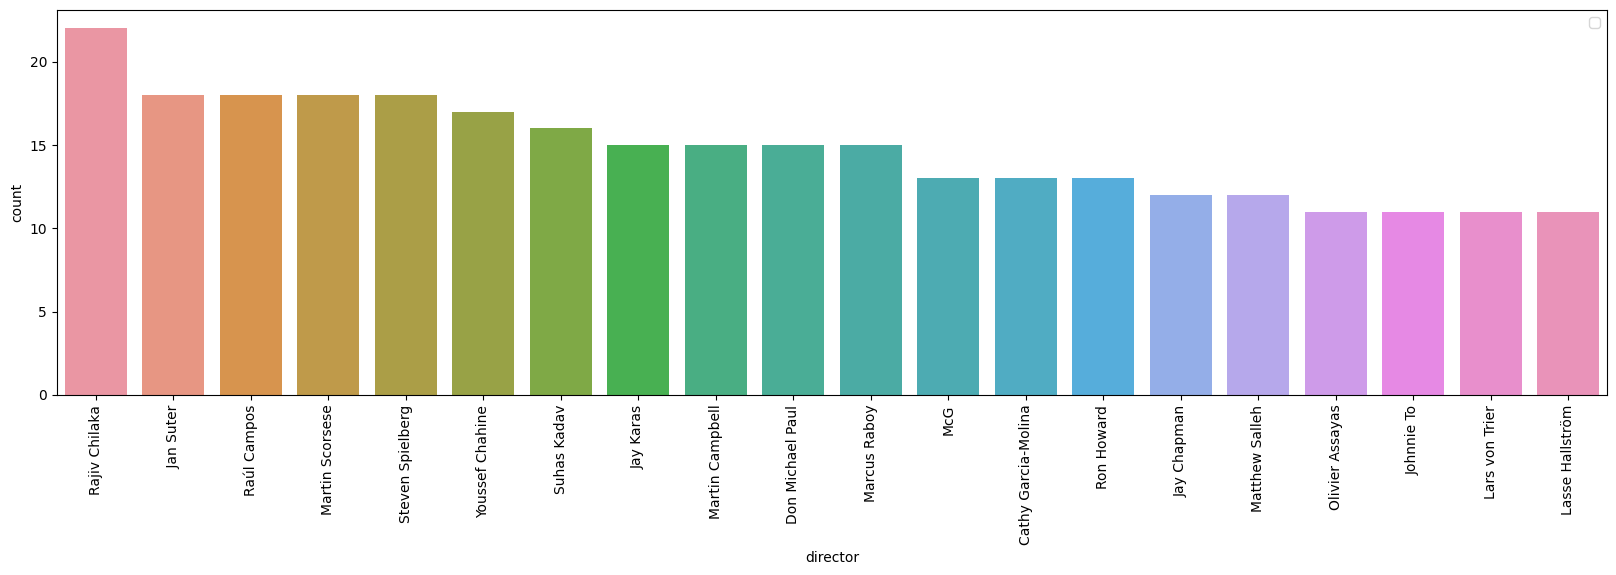

In [47]:
plt.figure(figsize = (20, 5))
sns.barplot(x=movies_director_count['director'],y=movies_director_count['count'])
plt.xticks(rotation=90)
plt.legend()

Here we can see Rajiv Chilaka	 is most popular director in movies.

<h2> Lets See which director has worked on which type of  Movie<h2>

In [48]:
movies_director_type=movies_director.explode('listed_in')
movies_director_type_count=movies_director_type.groupby(['director','listed_in'])['show_id']\
                      .count().reset_index().rename(columns={'show_id':'count'}).sort_values(by='count',ascending=False).head(30)
movies_director_type_count


,director,listed_in,count
8880,Rajiv Chilaka,Children & Family Movies,22
9005,Raúl Campos,Stand-Up Comedy,18
477,Jan Suter,Stand-Up Comedy,18
11425,Youssef Chahine,Dramas,17
10410,Suhas Kadav,Children & Family Movies,16
11427,Youssef Chahine,International Movies,15
7057,Marcus Raboy,Stand-Up Comedy,15
7185,Martin Campbell,Action & Adventure,15
5281,Jay Karas,Stand-Up Comedy,14
3781,Don Michael Paul,Action & Adventure,13


Here we can see Most popular director Rajiv Chilaka has mostly worked on 	Children & Family Movies and Stand-Up Comedy

<h2> Lets explore directors for TV shows<h2>

In [49]:
tv_shows_director=tv_shows.explode('director')
tv_shows_director=tv_shows_director[tv_shows_director['director']!='Unknown Director']
tv_shows_director_count=tv_shows_director['director'].value_counts().to_frame().reset_index().rename(columns={'index':'director','director':'count'})\
        .sort_values(by=['count'],ascending=False).head(20)

tv_shows_director_count


,director,count
0,Alastair Fothergill,8
2,Elaine McMillion Sheldon,5
3,Chico Pereira,5
4,Fahad Mustafa,5
5,Hikaru Toda,5
6,Deepti Kakkar,5
7,Caroline Sá,5
1,Moyoung Jin,5
12,Laïla Marrakchi,4
14,Alan Poul,4


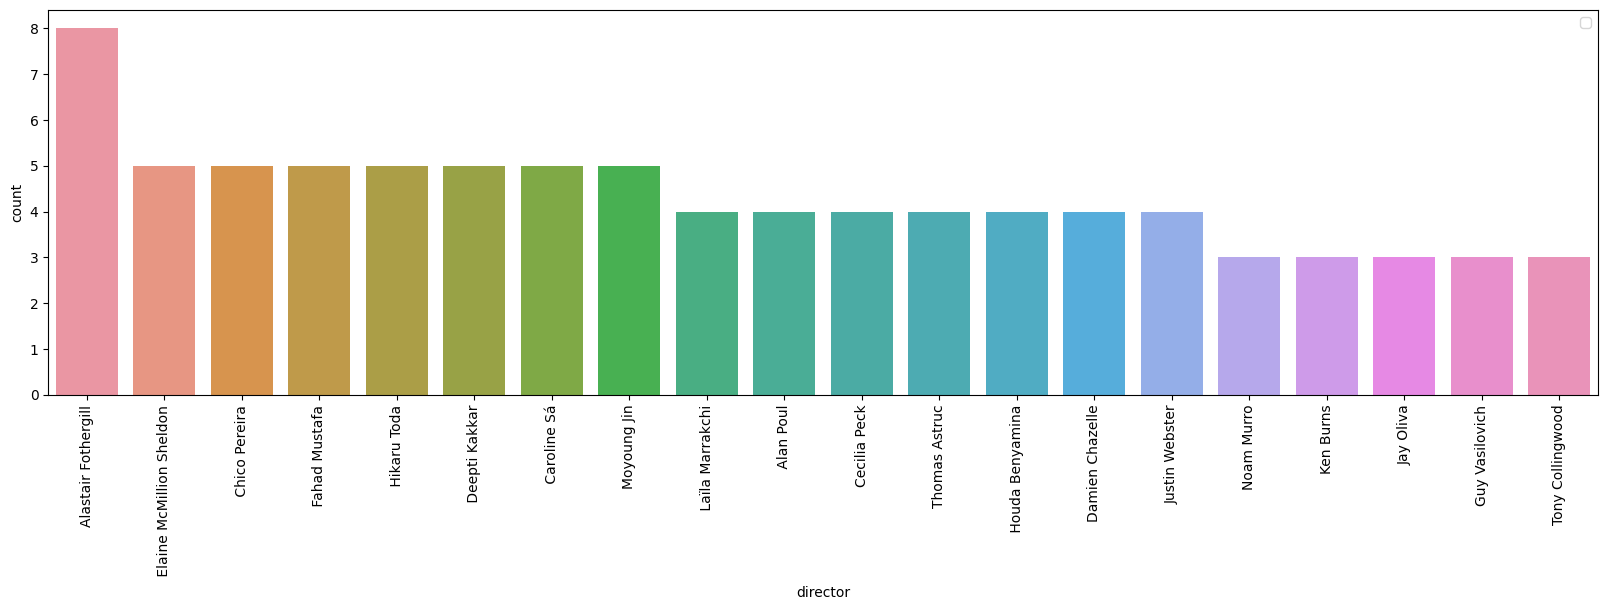

In [50]:
plt.figure(figsize = (20, 5))
sns.barplot(x=tv_shows_director_count['director'],y=tv_shows_director_count['count'])
plt.xticks(rotation=90)
plt.legend()

Here we can see Alastair Fothergill	 is most famous director in TV shows

<h2> lets explore which directors has worked with which cast<h2>

In [51]:
tv_shows_director_cast=tv_shows_director.explode('cast')
tv_shows_director_cast=tv_shows_director_cast[tv_shows_director_cast['cast']!='Unknown Cast']
tv_shows_director_cast_count=tv_shows_director_cast.groupby(['director','cast'])['show_id']\
                      .count().reset_index().rename(columns={'show_id':'count'}).sort_values(by='count',ascending=False).head(30)
tv_shows_director_cast_count


,director,cast,count
703,Alastair Fothergill,David Attenborough,8
909,Damien Chazelle,Joanna Kulig,4
2244,Thomas Astruc,André Gordon,4
908,Damien Chazelle,Elyes Aguis,4
247,Houda Benyamina,Adil Dehbi,4
248,Houda Benyamina,Amandla Stenberg,4
249,Houda Benyamina,Benjamin Biolay,4
250,Houda Benyamina,Damian Nueva Cortes,4
251,Houda Benyamina,Elyes Aguis,4
252,Houda Benyamina,Joanna Kulig,4


Here we can see most famous director Alastair Fothergill has mostly worked with actor	David Attenborough

<h2> Lets explore which director has worked on which type of TV shows<h2>

In [52]:
tv_shows_director_type=tv_shows_director.explode('listed_in')
tv_shows_director_type_count=tv_shows_director_type.groupby(['director','listed_in'])['show_id']\
                      .count().reset_index().rename(columns={'show_id':'count'}).sort_values(by='count',ascending=False).head(30)
tv_shows_director_type_count

,director,listed_in,count
180,Alastair Fothergill,International TV Shows,8
179,Alastair Fothergill,Docuseries,8
178,Alastair Fothergill,British TV Shows,8
515,Moyoung Jin,Docuseries,5
52,Hikaru Toda,Docuseries,5
36,Chico Pereira,Docuseries,5
23,Caroline Sá,Docuseries,5
40,Deepti Kakkar,Docuseries,5
44,Elaine McMillion Sheldon,Docuseries,5
45,Fahad Mustafa,Docuseries,5


Here we can see most famous director for TV shows Alastair Fothergill	has mostly worked on International TV Shows,Docuseries,British TV Shows

<h1> Lets explore which Type of Movie is more popular<h1>

In [53]:
movies_type=movies.explode('listed_in')
movies_type_count=movies_type['listed_in'].value_counts().to_frame().reset_index().rename(columns={'index':'listed_in','listed_in':'count'})\
        .sort_values(by=['count'],ascending=False)

movies_type_count

,listed_in,count
0,International Movies,3509
1,Dramas,3198
2,Comedies,1981
3,Action & Adventure,1182
4,Documentaries,1116
5,Independent Movies,1040
6,Children & Family Movies,845
7,Thrillers,806
8,Romantic Movies,722
9,Horror Movies,458


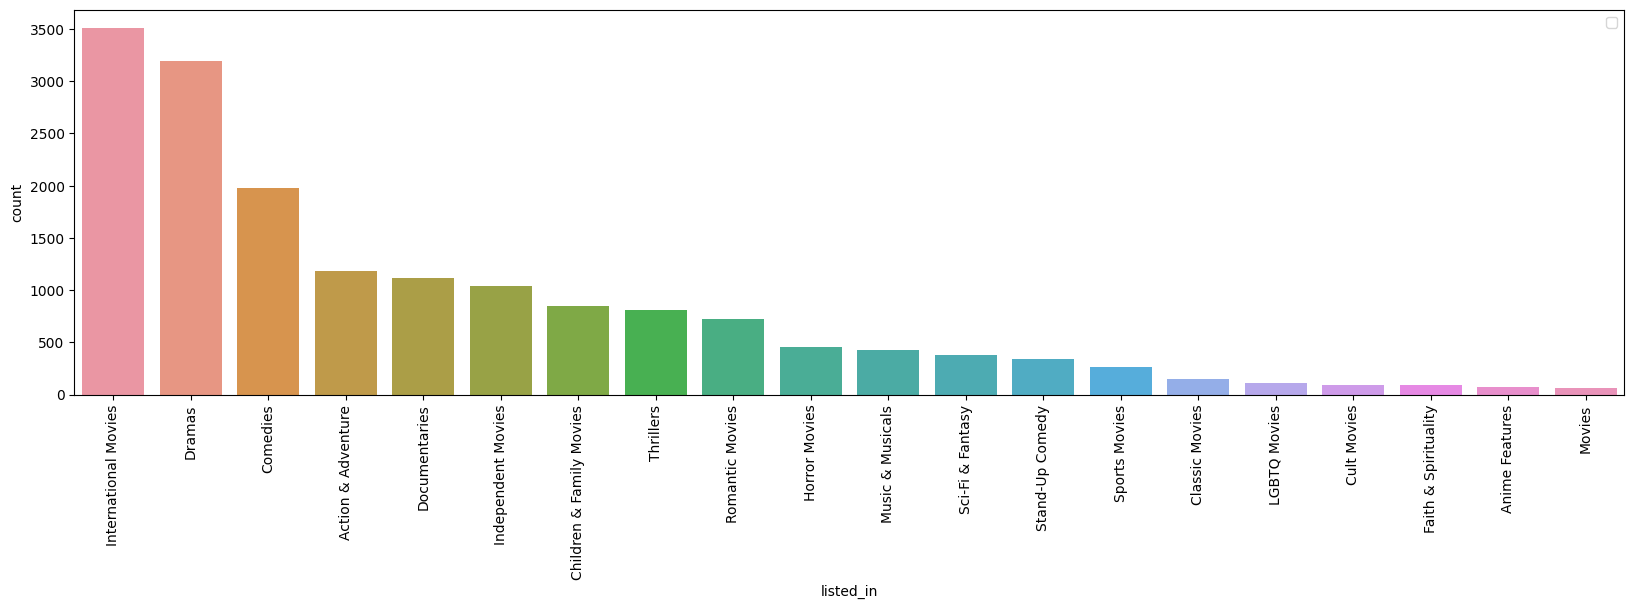

In [54]:
plt.figure(figsize = (20, 5))
sns.barplot(x=movies_type_count['listed_in'],y=movies_type_count['count'])
plt.xticks(rotation=90)
plt.legend()

Here we can see International Movies is by far the most popular movie genre in Netflix.

<h1>Lets explore which Type of TV Shows is more popular<h1>

In [55]:
tv_shows_type=tv_shows.explode('listed_in')
tv_shows_type_count=tv_shows_type['listed_in'].value_counts().to_frame().reset_index().rename(columns={'index':'listed_in','listed_in':'count'})\
        .sort_values(by=['count'],ascending=False)

tv_shows_type_count

,listed_in,count
0,International TV Shows,1465
1,TV Dramas,852
2,TV Comedies,630
3,Kids' TV,596
4,Crime TV Shows,541
5,Docuseries,436
6,Romantic TV Shows,384
7,British TV Shows,306
8,Reality TV,270
9,TV Action & Adventure,204


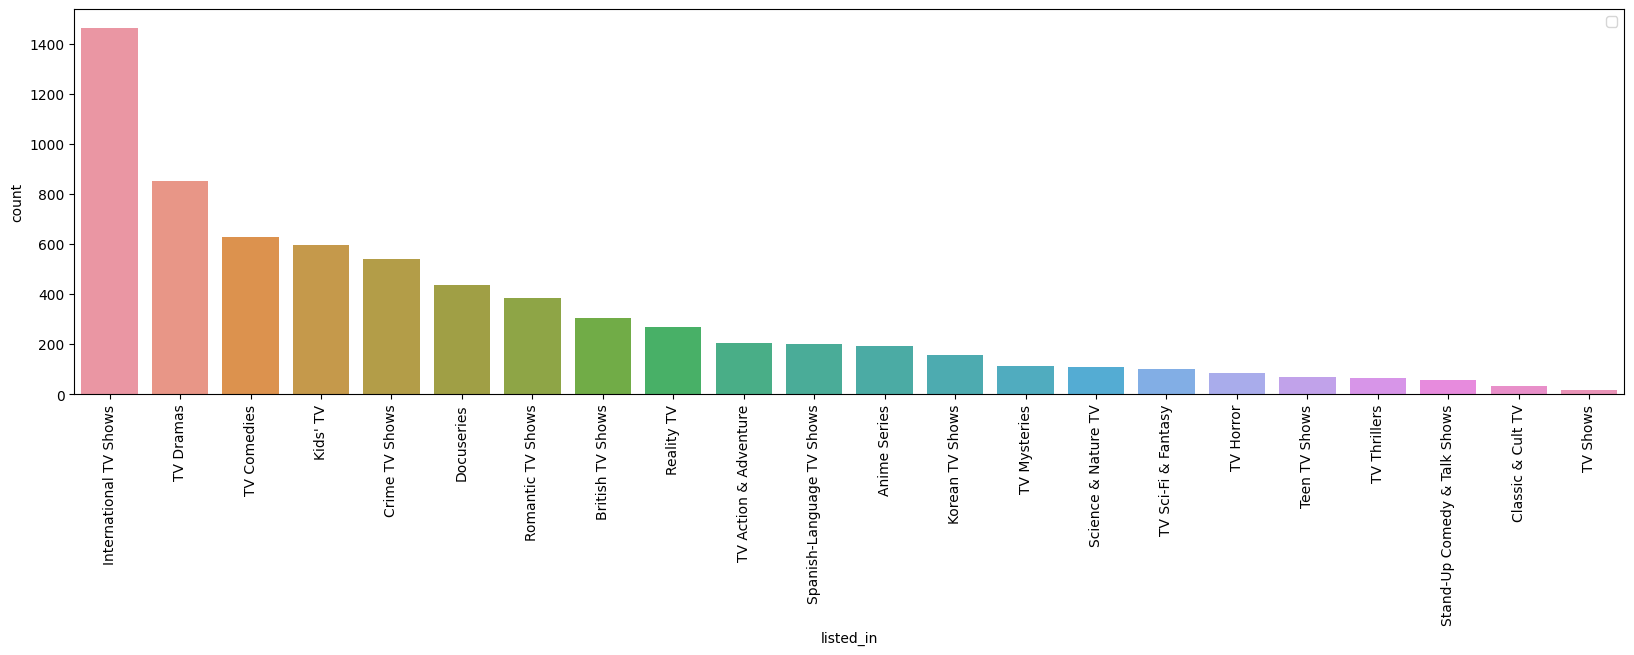

In [56]:
plt.figure(figsize = (20, 5))
sns.barplot(x=tv_shows_type_count['listed_in'],y=tv_shows_type_count['count'])
plt.xticks(rotation=90)
plt.legend()

Here we can see International TV Shows is the most popular TV show types in netflix.

<h1> Lets analyse the Duration for movies and TV Shows<h1>

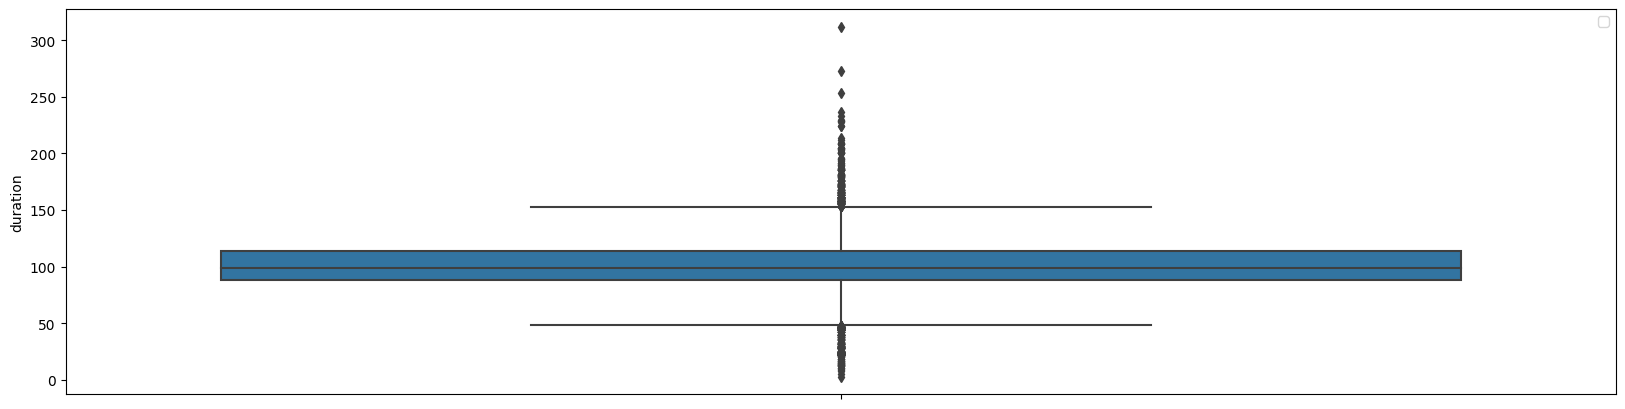

In [57]:
plt.figure(figsize = (20, 5))
sns.boxplot(data=movies,y='duration')
plt.xticks(rotation=90)
plt.legend()

Here we can see most(75%) of the movies are 60 to 130 minute long in netflix.

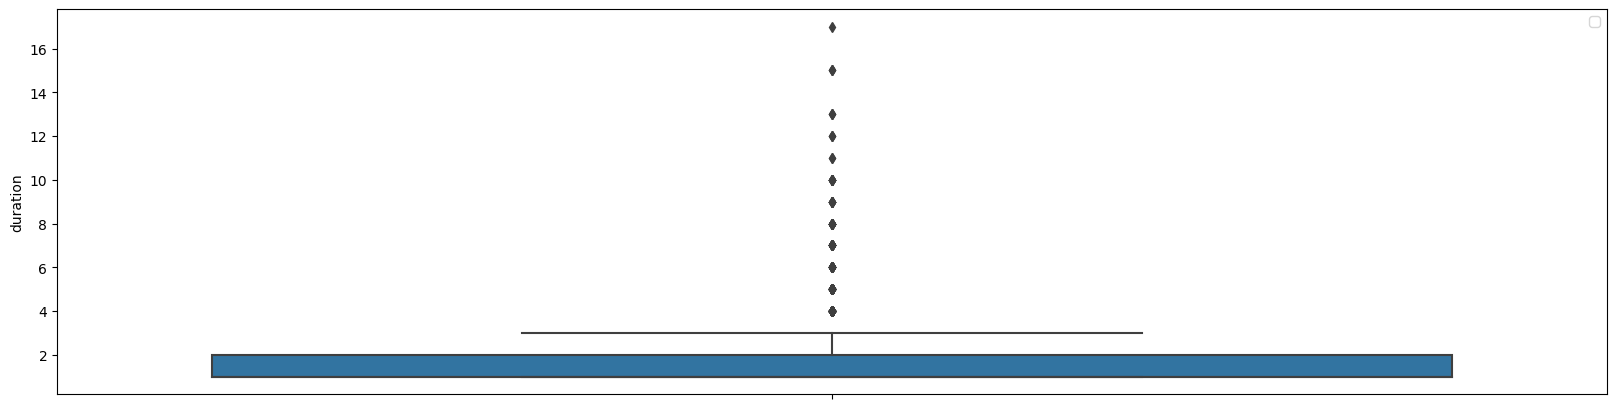

In [58]:
plt.figure(figsize = (20, 5))
sns.boxplot(data=tv_shows,y='duration')
plt.xticks(rotation=90)
plt.legend()

Here We can see most(75%) of TV shows are of 1 to 2 season long in netflix.

<h1> Analyse the corelation betwee country and genre for movies<h1>

In [59]:
movies_top_countries_list=movies.groupby('country')['show_id']\
                  .count().reset_index().sort_values(by='show_id',ascending=False).head(16)['country']

movies_top_countries_list


movies_top_countries=movies[(movies['country']!='Unknown Country') & (movies['country'].isin(movies_top_countries_list))]
movies_top_countries=movies_top_countries.explode('listed_in')

movies_top_countries_listed_in_list=movies_top_countries.groupby('listed_in')['show_id']\
                  .count().reset_index().sort_values(by='show_id',ascending=False).head(15)['listed_in']

movies_top_countries_listed_in=movies_top_countries[movies_top_countries['listed_in'].isin(movies_top_countries_listed_in_list)]

movies_pivot=pd.pivot_table(movies_top_countries_listed_in,index='country',columns='listed_in',values='show_id',aggfunc='nunique')
movies_pivot.fillna(0,inplace=True)
movies_pivot

listed_in,Action & Adventure,Children & Family Movies,Classic Movies,Comedies,Documentaries,Dramas,Horror Movies,Independent Movies,International Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
country,,,,,,,,,,,,,,,
Australia,13.0,19.0,5.0,15.0,15.0,38.0,3.0,8.0,30.0,4.0,6.0,7.0,8.0,3.0,9.0
Canada,44.0,80.0,0.0,94.0,42.0,82.0,36.0,44.0,60.0,14.0,25.0,28.0,13.0,2.0,49.0
China,63.0,16.0,0.0,31.0,7.0,32.0,2.0,2.0,71.0,2.0,9.0,13.0,1.0,0.0,6.0
Egypt,15.0,1.0,8.0,57.0,2.0,44.0,3.0,5.0,99.0,4.0,12.0,0.0,2.0,0.0,4.0
France,37.0,23.0,6.0,51.0,44.0,167.0,10.0,73.0,207.0,8.0,22.0,10.0,12.0,5.0,44.0
Germany,33.0,17.0,0.0,42.0,21.0,80.0,7.0,31.0,94.0,8.0,10.0,13.0,5.0,5.0,28.0
Hong Kong,66.0,3.0,1.0,33.0,1.0,33.0,0.0,4.0,82.0,1.0,10.0,4.0,1.0,0.0,3.0
India,137.0,26.0,11.0,323.0,27.0,662.0,35.0,167.0,864.0,96.0,120.0,12.0,17.0,6.0,92.0
Indonesia,6.0,6.0,0.0,15.0,2.0,63.0,10.0,1.0,80.0,1.0,27.0,2.0,4.0,0.0,0.0


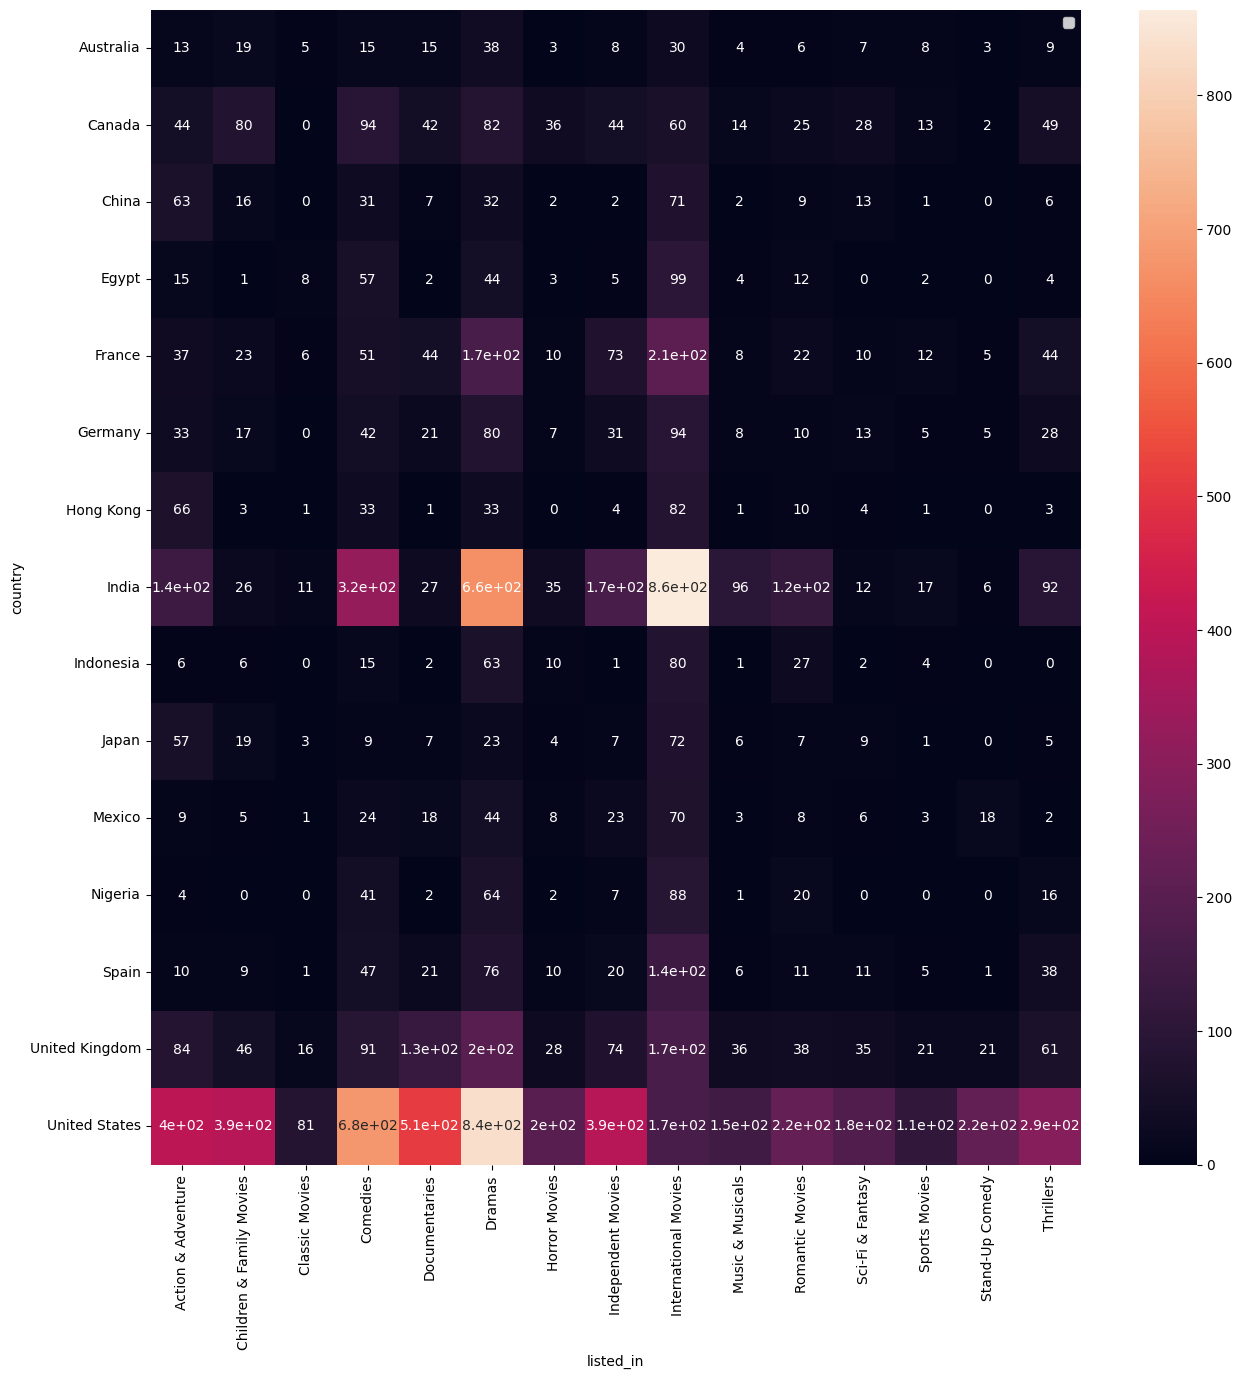

In [60]:
plt.figure(figsize = (15, 15))
sns.heatmap(data=movies_pivot,annot=True)
plt.xticks(rotation=90)
plt.legend()

<h1> Analyse the corelation betwee country and genre for TV shows<h1>

In [61]:
tv_shows_top_countries_list=tv_shows.groupby('country')['show_id']\
                  .count().reset_index().sort_values(by='show_id',ascending=False).head(11)['country']

tv_shows_top_countries_list


tv_shows_top_countries=tv_shows[(tv_shows['country']!='Unknown Country') & (tv_shows['country'].isin(tv_shows_top_countries_list))]
tv_shows_top_countries=tv_shows_top_countries.explode('listed_in')

tv_shows_top_countries_listed_in_list=tv_shows_top_countries.groupby('listed_in')['show_id']\
                  .count().reset_index().sort_values(by='show_id',ascending=False).head(10)['listed_in']

tv_shows_top_countries_listed_in=tv_shows_top_countries[tv_shows_top_countries['listed_in'].isin(tv_shows_top_countries_listed_in_list)]

tv_shows_pivot=pd.pivot_table(tv_shows_top_countries_listed_in,index='country',columns='listed_in',values='show_id',aggfunc='nunique')
tv_shows_pivot.fillna(0,inplace=True)
tv_shows_pivot

listed_in,Anime Series,British TV Shows,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Reality TV,Romantic TV Shows,TV Comedies,TV Dramas
country,,,,,,,,,,
Australia,1.0,5.0,7.0,11.0,31.0,21.0,11.0,3.0,17.0,19.0
Canada,2.0,3.0,15.0,11.0,25.0,61.0,9.0,2.0,30.0,32.0
France,0.0,2.0,23.0,7.0,43.0,43.0,2.0,2.0,24.0,27.0
India,0.0,3.0,9.0,9.0,66.0,12.0,6.0,12.0,26.0,28.0
Japan,143.0,1.0,16.0,2.0,151.0,29.0,9.0,21.0,10.0,21.0
South Korea,0.0,0.0,24.0,0.0,152.0,16.0,4.0,77.0,19.0,38.0
Spain,1.0,5.0,27.0,9.0,54.0,4.0,3.0,9.0,5.0,11.0
Taiwan,0.0,0.0,5.0,0.0,70.0,0.0,1.0,48.0,36.0,29.0
United Kingdom,0.0,225.0,48.0,89.0,128.0,43.0,35.0,11.0,44.0,36.0


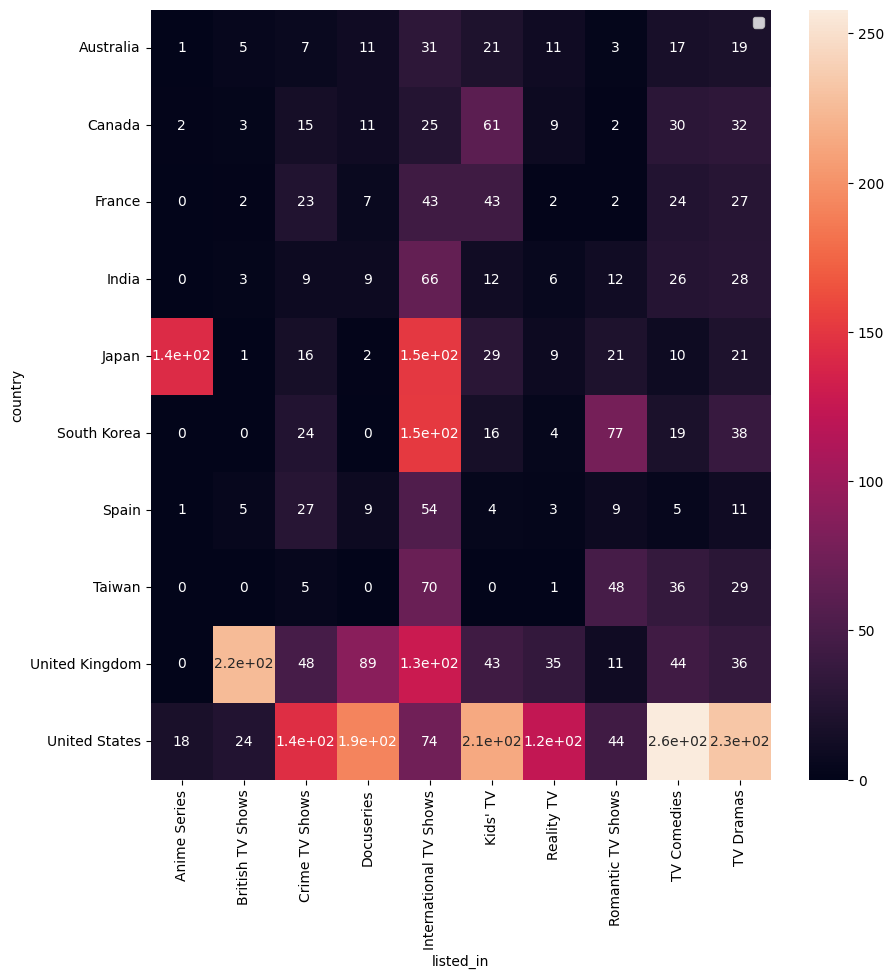

In [62]:
plt.figure(figsize = (10, 10))
sns.heatmap(data=tv_shows_pivot,annot=True)
plt.xticks(rotation=90)
plt.legend()

<h1> Analyse whether Netflix has more focus on TV Shows than movies in recent years<h1>

In [63]:
netflix['date_added']=pd.to_datetime(netflix['date_added'])
netflix['date_added'].fillna(max(netflix['date_added']),inplace=True)
netflix['date_added_year'] = netflix['date_added'].dt.year.astype(int)

In [64]:
netflix_date_added_year=netflix.groupby(['date_added_year','type'])['show_id']\
                          .count().reset_index().rename(columns={'show_id':'count'})
netflix_date_added_year

,date_added_year,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,17
5,2012,Movie,4
6,2013,Movie,6
7,2013,TV Show,7
8,2014,Movie,25
9,2014,TV Show,9


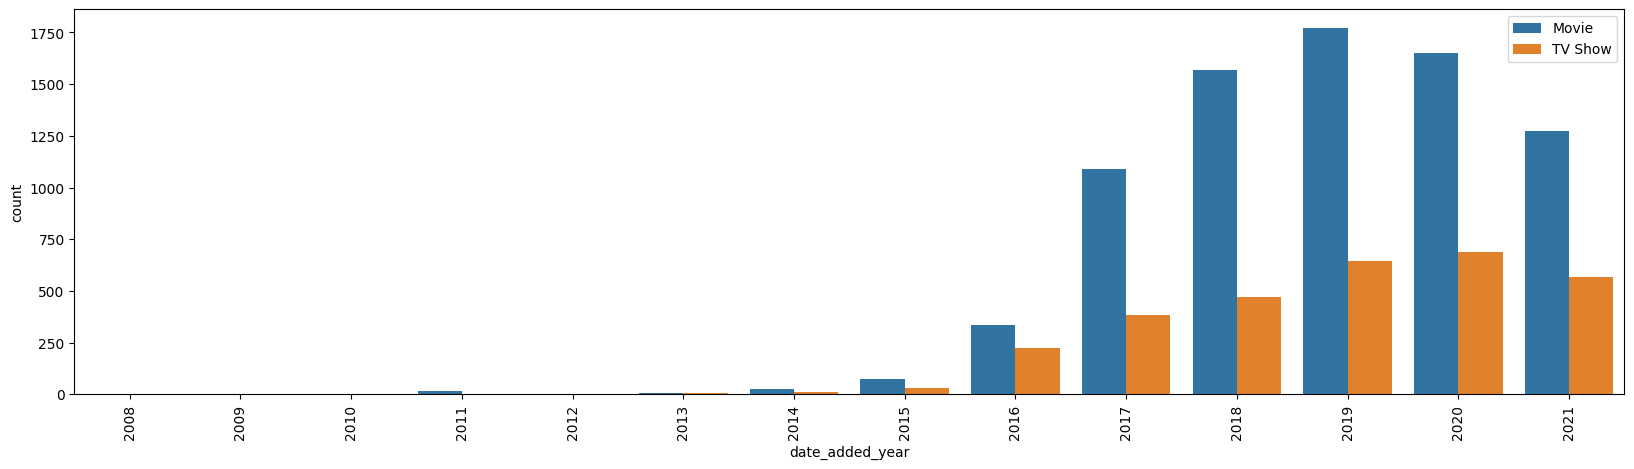

In [65]:
plt.figure(figsize = (20, 5))
sns.barplot(data=netflix_date_added_year,x='date_added_year',y='count',hue='type')
plt.xticks(rotation=90)
plt.legend()

From the analysis we can see netflix always has more focus on Movies than TV shows but in recent years focus on tv shows has increased

<h1>Business Insights<h1>

1. In January and July Movies are more popular.
2. In US January is Most popular month for Movies
3. In India December is most popular month for movies
4. In Jaoan septemebr is most popular for movies
5. In movies , International movies are most popular then other genres
<Br><Br>
6. In December TV shows are more popular than movies.
7. In US September is most popular for TV shows
8. In Japan June and December is most popular for TV shows
9. In UK March is most popular for TV show.
10. In TV shows , International Tv Shows are most popular then other genres
<Br><Br>
11. Us,UK,Japana and India is top country in netflix for their content.
12. Indian cast and directors are more popular in movies

<h1>Recommendations<h1>


1. Add more movies in January and July
2. Add more TV shows in Decemeber
3. Add more movies from Indian director
4. Try to Add more customer in other months in the year to increase revenue